In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


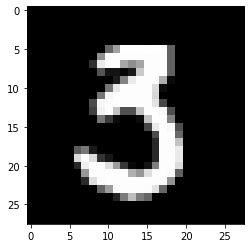

In [ ]:
plt.imshow(x_train[5080], cmap="gray")
plt.show()

In [ ]:
y_train[50]

3

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Preprocessing the data

In [ ]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
print(y_train[0])
print(y_train_ohe[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L1L2

In [ ]:
model = Sequential() # Empty Model without any layers
model.add(Input(784,))
model.add(Dense(units=50, activation="relu"))
# model.add(Dense(units=50, activation="relu", kernel_regularizer = L1L2(l1=0, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe), epochs=100, batch_size=1000)

Epoch 1/100
60/60 [==============================] - 2s 12ms/step - loss: 1.1226 - accuracy: 0.6780 - val_loss: 0.4863 - val_accuracy: 0.8826
Epoch 2/100
60/60 [==============================] - 1s 9ms/step - loss: 0.4930 - accuracy: 0.8620 - val_loss: 0.3363 - val_accuracy: 0.9119
Epoch 3/100
60/60 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.8897 - val_loss: 0.2818 - val_accuracy: 0.9224
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 0.3348 - accuracy: 0.9047 - val_loss: 0.2491 - val_accuracy: 0.9299
Epoch 5/100
60/60 [==============================] - 0s 8ms/step - loss: 0.3024 - accuracy: 0.9132 - val_loss: 0.2289 - val_accuracy: 0.9362
Epoch 6/100
60/60 [==============================] - 1s 9ms/step - loss: 0.2780 - accuracy: 0.9199 - val_loss: 0.2102 - val_accuracy: 0.9383
Epoch 7/100
60/60 [==============================] - 1s 10ms/step - loss: 0.2580 - accuracy: 0.9268 - val_loss: 0.1947 - val_accuracy: 0.9447
Epoch 8/100

In [ ]:
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

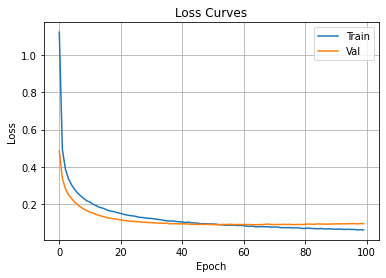

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

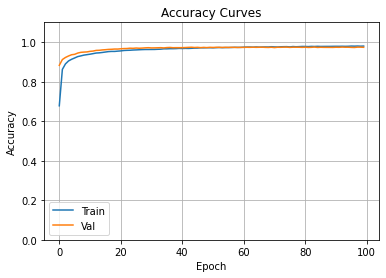

In [ ]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.title("Accuracy Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
preds = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
preds.shape

(10000, 10)

In [ ]:
np.argmax(preds[90])
preds_class = np.argmax(preds, axis=1)

3

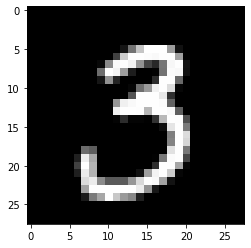

In [ ]:
plt.imshow(x_test[90].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
confusion_matrix(y_test, preds_class)

array([[ 968,    0,    0,    2,    1,    2,    3,    1,    2,    1],
       [   0, 1123,    4,    0,    0,    1,    3,    2,    2,    0],
       [   7,    3,  997,   10,    2,    0,    2,    4,    7,    0],
       [   0,    0,    8,  986,    2,    2,    1,    4,    0,    7],
       [   2,    0,    2,    0,  959,    0,    5,    3,    2,    9],
       [   2,    1,    1,   15,    1,  857,    8,    0,    4,    3],
       [   5,    1,    3,    0,    4,    3,  941,    1,    0,    0],
       [   2,    4,    9,    4,    2,    0,    0,  995,    3,    9],
       [   6,    1,    4,   12,    4,    2,    3,    5,  934,    3],
       [   2,    3,    0,   10,   10,    4,    1,    7,    4,  968]],
      dtype=int64)

In [ ]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

